## Anurag Pandey
### 280047
### ML Lab 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%precision 4
%matplotlib inline

In [2]:
def sigmoid(e):
    '''
    returns the sigmoid of the values
    '''
    return (1/(1+np.exp(-e)))

def gradient_value(x,y,b):
    '''
    Returns the gradient value of the logistic funciton
    '''
    return np.matmul(x.T,(y-sigmoid(np.matmul(x,b))))

#returns the function value
def gradient_value_scalar(x,y,b):
    '''
       scalar form of the gradient for adagrad
    '''
    return x*(y-sigmoid(x*b))

#returns the gradient value
def function_value(x,y,b):
    '''
    returns the function value logistic function 
    '''
    return np.matmul(y.T,np.matmul(x,b))-np.log(1+(sigmoid(np.matmul(x,b))))

def bold_step(x,y,beta,beta_new,alpha=1):
    '''
    bold step: returns a higher alpha if the new value is greater than the last value(ascent here) else
    decrease the stepsize
    '''
    alpha_p = 1.05
    alpha_m = 0.05
    if ((function_value(x,y,beta_new)).all() < (function_value(x,y,beta)).all()):
        alpha*=alpha_p
    else:
        alpha*=alpha_m
    return alpha

def residual(f_prev,f_curr):
    '''
    difference between the last and the current function value
    '''
    return np.around(np.mean(np.abs(f_prev-f_curr)), decimals= 9)

def crossEntropy(y,y_pred,eps = 1e-15):
    '''
    log loss function implementation 
    '''
    y_pred=sigmoid(y_pred)
    return -np.sum(np.matmul(y.T,np.log(y_pred))+np.matmul((1-y).T,np.log(1-y_pred)))/len(y_pred)

def gradient_descent(data_shuffler,beta_shape,N=0.00001, alpha=1, tol= 1e-6):
    '''
    SGD iterates over all the row in shuffled manner and updates the parameters
    step size is determined using the bold length at the end of each epoch 
    '''
    residual_plot_test = {}
    residual_plot_train = {}
    crossentropy = {}
    beta = np.ones((beta_shape,1))
    beta_old = []
    iter = 0 
    for k in range(N):
        x_train,x_test,y_train,y_test =data_shuffler()
        beta_old = beta.copy()
        for row,y in zip(x_train.values,y_train):
            grad = gradient_value(np.matrix(row),y,beta)
            beta = beta + alpha*grad
        alpha = bold_step(x_train,y_train,beta_old,beta,alpha)
        residual_plot_test[k] = residual(function_value(x_test,y_test,beta_old),function_value(x_test,y_test,beta))
        crossentropy[k] =  crossEntropy(y_test, np.matmul(x_test,beta))
    plot(residual_plot_train,residual_plot_test, crossentropy, "Gradient Descent with learning rate "+str(alpha))
    print(f"The log loss observed on test set was {crossentropy[k]}")
    return beta, residual_plot_train, crossentropy

def gradient_descent_momentum(data_shuffler,beta_shape,N=0.00001, alpha=1, tol= 1e-6, mom = 0.9):
    '''
    implements the SGD using momentum which adds a velocity to the gradient value thus minimizing the fluctutations
    '''
    residual_plot_test = {}
    residual_plot_train = {}
    crossentropy = {}
    beta = np.ones((beta_shape,1))
    velocity = np.zeros((beta_shape,1))
    beta_old = []
    iter = 0 
    for k in range(N):
        x_train,x_test,y_train,y_test =data_shuffler()
        beta_old = beta.copy()
        for row,y in zip(x_train.values,y_train):
            grad = gradient_value(np.matrix(row),y,beta)
            velocity = mom*velocity + alpha*grad
            beta = beta + velocity
        residual_plot_test[k] = residual(function_value(x_test,y_test,beta_old),function_value(x_test,y_test,beta))
        crossentropy[k] =  crossEntropy(y_test, np.matmul(x_test,beta))
    plot(residual_plot_train,residual_plot_test, crossentropy, "Gradient Descent with learning rate "+str(alpha))
    print(f"The log loss observed on test set was {crossentropy[k]}")
    return beta, residual_plot_train, crossentropy

def adaGrad(data_shuffler,beta_shape,N=0.00001, alpha=1):
    '''
    Adaptive Gradient regulates the parameter learning based on each parameter rather than cumulative updates
    '''
    residual_plot_test = {}
    residual_plot_train = {}
    crossentropy = {}
    beta = np.ones((beta_shape,1))
    hist = 1e-10*np.ones((beta_shape,1))
    beta_old = np.zeros((beta_shape,1))
    for k in range(N):
        x_train,x_test,y_train,y_test =data_shuffler()
        beta_old = beta.copy()
        for row,y in zip(x_train.values,y_train):
            for i in range(0,beta_shape):
                y_pred = row[i]*beta[i]
                grad = gradient_value_scalar(row[i],y,beta[i])
                hist[i] += grad**2
                beta[i] = beta[i] +  (alpha/np.sqrt(hist[i]))*grad
        residual_plot_test[k] = residual(function_value(x_test,y_test,beta_old),function_value(x_test,y_test,beta))
        crossentropy[k] =  crossEntropy(y_test, np.matmul(x_test,beta))
    plot(residual_plot_train,residual_plot_test, crossentropy, "Gradient Descent with learning rate "+str(alpha))
    print(f"The log loss observed on test set was {crossentropy[k]}")
    return beta, residual_plot_train, crossentropy

def plot(residual_plot_train,residual_plot_test, crossentropy,title):
    '''
    Plots the residual and log loss curve
    '''
    fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True,figsize=(14, 10))
    ax1.plot(list(residual_plot_test.keys()),list(residual_plot_test.values()),'-g')
    #print(residual_plot_test)
    ax2.plot(list(crossentropy.keys()),list(crossentropy.values()),'-r')
    ax1.legend(['Residual vs Iteration Test'])
    ax2.legend(['Cross Entropy vs Iteration'])
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Residual')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Log loss')
    ax1.grid()
    ax2.grid()
    ax1.set_title(title)
    ax2.set_title(title)

## Room Data

### Approach to the problem

- First we look at the data, and identify the nature of the columns and relationship among them 

In [4]:
room_occupancy_data = pd.read_csv(r'C:\Users\Anurag\Desktop\ML_LAB\ML LAB 4\datatest2.txt', sep=',')
room_occupancy_data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


- We observe that date column is present, for a better understanding and fine grading we can decompose this date column into hour minute, this would enable us to learn the model better

In [5]:
room_occupancy_data['year'] = pd.DatetimeIndex(room_occupancy_data['date']).year
room_occupancy_data['month'] = pd.DatetimeIndex(room_occupancy_data['date']).month
room_occupancy_data['day'] = pd.DatetimeIndex(room_occupancy_data['date']).day
room_occupancy_data['hour'] = pd.DatetimeIndex(room_occupancy_data['date']).hour
room_occupancy_data['min'] = pd.DatetimeIndex(room_occupancy_data['date']).minute
room_occupancy_data.drop('date',axis=1,inplace=True)
room_occupancy_data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,year,month,day,hour,min
1,21.7600,31.133333,437.333333,1029.666667,0.005021,1,2015,2,11,14,48
2,21.7900,31.000000,437.333333,1000.000000,0.005009,1,2015,2,11,14,49
3,21.7675,31.122500,434.000000,1003.750000,0.005022,1,2015,2,11,14,50
4,21.7675,31.122500,439.000000,1009.500000,0.005022,1,2015,2,11,14,51
5,21.7900,31.133333,437.333333,1005.666667,0.005030,1,2015,2,11,14,51


#### Since we have a single value for year and month, we can safely drop these values

In [6]:
print(room_occupancy_data['year'].unique())
print(room_occupancy_data['month'].unique())
room_occupancy_data.drop(['year','month'],axis=1,inplace=True)

[2015]
[2]


#### Determines a non numeric data column to create dummies for 

In [ ]:
non_num = room_occupancy_data.select_dtypes(exclude=np.number).columns
non_num

- Now we try to find and pick feature with significance

In [ ]:
f, ax = plt.subplots(figsize=(26, 10))
corr = room_occupancy_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### Observations
- Naturally the temperature will increase if we increase the occupancy
- CO2 content should also go up linearly as the occupants are more
- Humidity can also be taken into account since there is some small negative correlation
- HumidityRatio is a Derived quantity from temperature and relative humidity
- Occupancy of the room can surely be affected by the hour of the day as well

#### Hence we will be using Light, Hour and Humidity as our feature

In [85]:
room_occupancy_data = room_occupancy_data[['Light','hour','Humidity','Occupancy']]
room_occupancy_data.shape

(9752, 4)

### Model 
- We normalize the data and record the min and max value(using the min max normalization)
- Insert the bias column at index 0
- Create the response variable

In [86]:
#normalize the data
min_val = room_occupancy_data.min()
max_val = room_occupancy_data.max()
room_occupancy_data = (room_occupancy_data-min_val)/(max_val-min_val)
#add bias column at index 0
room_occupancy_data.insert(0,'Bias',np.ones(9752))
#creating the Price column as predictor column`
room_occupancy = room_occupancy_data['Occupancy']
room_occupancy_data.drop('Occupancy',inplace=True, axis = 1)

- We need to shuffle the data for Stoastic Gradient Ascent, we do this by shuffling the index and then allocating the datapoints to test and train

In [87]:
def shuffle_data_room():
    index_matrices = np.arange(0,9752,1)
    np.random.shuffle(index_matrices)
    #print(index_matrices[:10])
    X_train_occupancy = room_occupancy_data.iloc[index_matrices[:7700]]
    X_test_occupancy = room_occupancy_data.iloc[index_matrices[7700:]]
    Y_train_occupancy = room_occupancy.iloc[index_matrices[:7700]].values.reshape(7700,1)
    Y_test_occupancy = room_occupancy.iloc[index_matrices[7700:]].values.reshape(2052,1) 
    #print(sigmoid(Y_train_occupancy))
    return X_train_occupancy,X_test_occupancy,Y_train_occupancy,Y_test_occupancy

#### Running the prediction for SGA using bold 

The log loss observed on test set was 0.4414918002606329


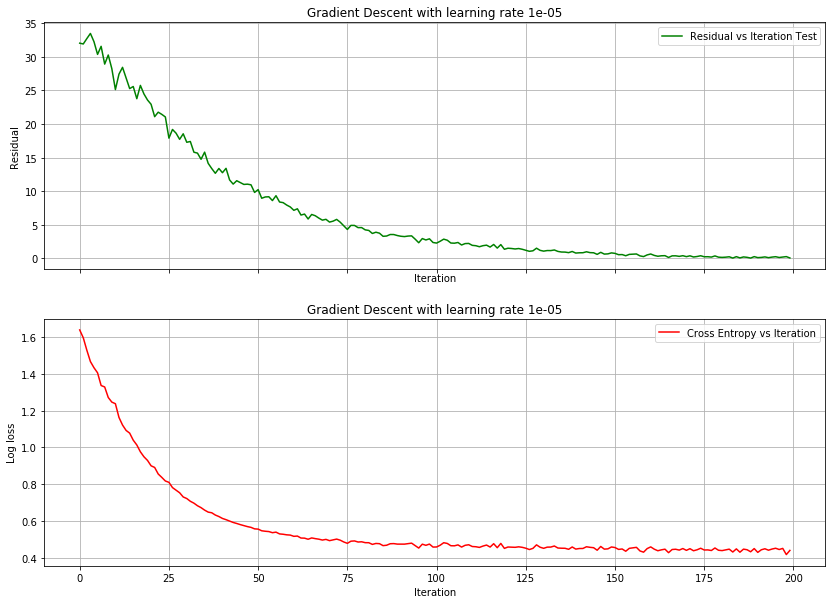

In [88]:
#perform the predictions 
m3,res_plot,rmse_plot = gradient_descent(shuffle_data_room, alpha=1e-5 ,beta_shape=4, N=200)

In [105]:
print(f"The upscaled error\n {((0.44149180)*(max_val-min_val))+min_val}")

The upscaled error
 Light        697.998536
hour          10.154311
Humidity      29.650708
Occupancy      0.441492
dtype: float64


#### Running the prediction using Adagrad

The log loss observed on test set was 0.4929104822170028


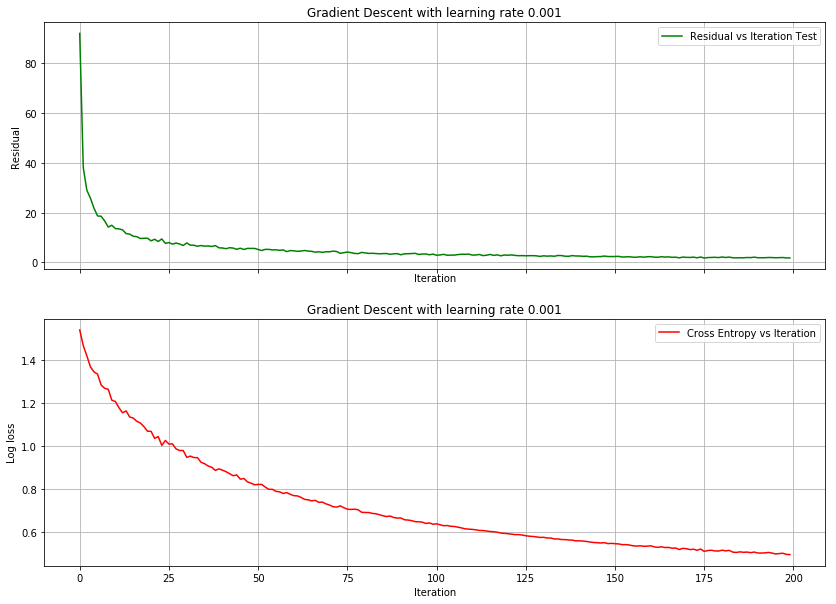

In [89]:
m4,res_plot,rmse_plot = adaGrad(shuffle_data_room, alpha=1e-3,beta_shape=4, N=200)

In [103]:
print(f"The upscaled error\n {((0.44149180)*(max_val-min_val))+min_val}")

The upscaled error
 Light        697.998536
hour          10.154311
Humidity      29.650708
Occupancy      0.441492
dtype: float64


#### Running the prediction using the momentum and  SGD

The log loss observed on test set was 0.26719169169114737


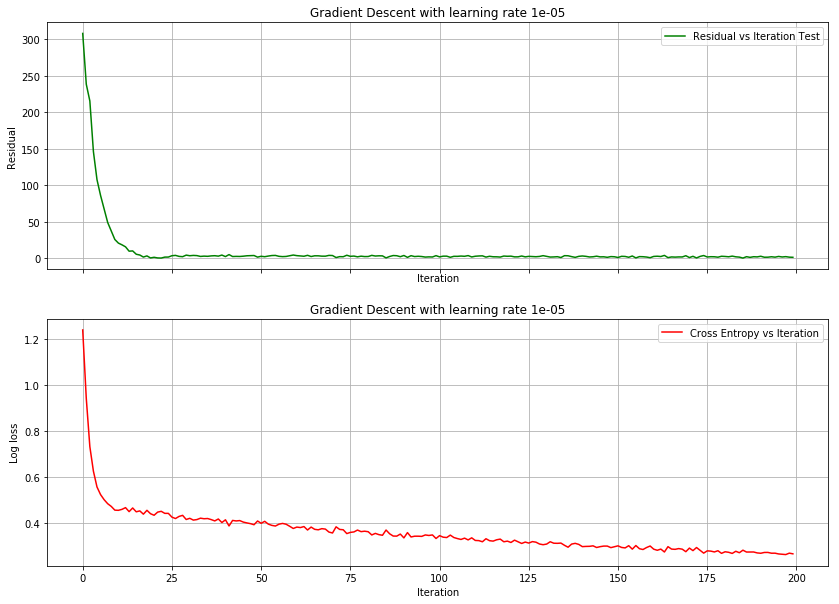

In [90]:
m5,res_plot,rmse_plaot = gradient_descent_momentum(shuffle_data_room, alpha=1e-5,beta_shape=4, N=200, mom=0.9)

In [104]:
print(f"The upscaled error\n {((0.2671916)*(max_val-min_val))+min_val}")

The upscaled error
 Light        422.429920
hour           6.145407
Humidity      26.576924
Occupancy      0.267192
dtype: float64


## Bank Data

### Approach to the problem

- First we look at the data, and identify the nature of the columns and relationship among them 

In [108]:
bank = pd.read_csv(r'C:\Users\Anurag\Desktop\ML_LAB\ML LAB 4\bank-additional-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Feature Category of Bank Client Data

### Preprocessing 
- As we can observe there are many features with non numeric values
- Creating one hot encoding variables can be done but it would increase the dimensionality of the model 
- Before reducing the features to all numeric we need to check for any empty values

#### Checking for empty values

- I identify the rows having the value Unknown, we can remove such values since I have large data and
  our prediction would not be impacted. Other ways of doing this are, using mean filling, running regression models for empty 
    values or by using algorithm that support missing values
- So I print out the percentage of the data points having NaN value

In [109]:
bank.replace(["unknown"],np.nan,inplace=True)
print(bank.isna().sum()/bank.shape[0])
bank.dropna(inplace=True)

age               0.000000
job               0.008012
marital           0.001942
education         0.042027
default           0.208726
housing           0.024036
loan              0.024036
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000000
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64


#### Checking for non existent values
- I found out that there is another value non existent which will not add any meaning to the model
- I intially find out how many values of each columns contain such values
- As it turns out more than 80% of the values of the column poutcome contain non existing values, hence we cannot drop the 
    rows having such value( would reduce our data points). A better approach would be to drop the column as such since it's 
    a poorly estimated attribute

In [110]:
bank.replace(["nonexistent"],np.nan,inplace=True)
print(bank.isna().sum()/bank.shape[0])
bank.drop(columns='poutcome',inplace=True)

age               0.000000
job               0.000000
marital           0.000000
education         0.000000
default           0.000000
housing           0.000000
loan              0.000000
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000000
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.847415
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64


- Now we identify the list of unique values for each category, the reason behind using  this is to simply use boolean substitution and also to identify any ordinal variables
- columns such as contact, default, housing and so on can subsitute value of 1 and 0 for their respective values

In [111]:
for col in bank.select_dtypes(exclude=[np.number]).columns:
    print(col, "--->",bank[col].unique())

job ---> ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed']
marital ---> ['married' 'single' 'divorced']
education ---> ['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'illiterate']
default ---> ['no' 'yes']
housing ---> ['no' 'yes']
loan ---> ['no' 'yes']
contact ---> ['telephone' 'cellular']
month ---> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ---> ['mon' 'tue' 'wed' 'thu' 'fri']
y ---> ['no' 'yes']


In [112]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [113]:
bank['y'] = bank['y'].replace(to_replace={'yes':1,'no':0})

### Feature Selection
- Since we had a large number of features to select from, each of which were divide in some category, I used the features of all these categories to perform a correlation study to pick the most relevant one of them
- 4 categories mentioned in the dataset were:

#### Feature Category of Bank Campaign

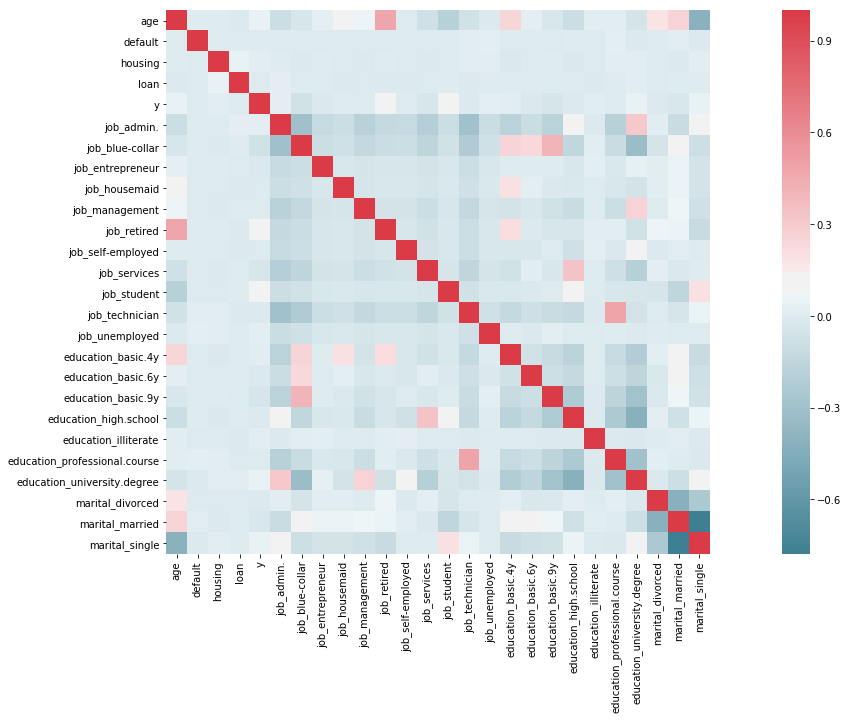

In [114]:
bank_client = bank[['age','job', 'education','marital','default','housing','loan','y']]
bank_client['default'] = bank_client['default'].replace(to_replace={'yes':1,'no':0})
bank_client['housing'] = bank_client['housing'].replace(to_replace={'yes':1,'no':0})
bank_client['loan'] = bank_client['loan'].replace(to_replace={'yes':1,'no':0})
non_num = ['job', 'education','marital',]
bank_client = pd.concat([bank_client.drop(non_num, axis=1), pd.get_dummies(bank_client[non_num])], axis=1)
bank_client.head()
f, ax = plt.subplots(figsize=(26, 10))
corr = bank_client.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

- Although this heatmap looks pretty huge, we can still use some very useful inferences to undestand the relationship between the features of our dataset
- There is a positive correaltion between job_retired and age, indicating that we can choose one parameter rather than picking both
- There is also a correlation between the jobs and education, for example, blue collar job have correlation with education_basic 4,6 and 9y.
- There is also a postive correlation between the age and marital_marriage

#### Feature Category of Bank Contact to Client Data

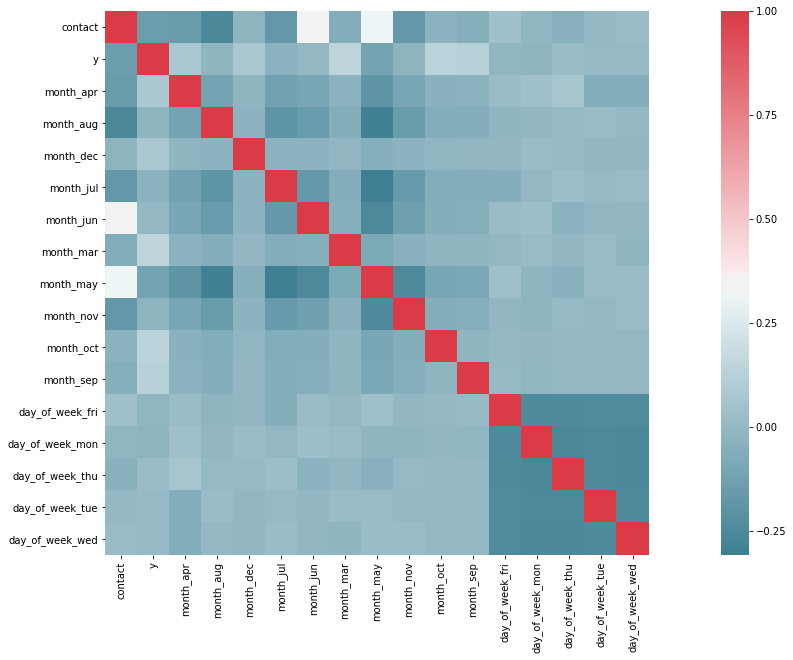

In [115]:
bank_contact = bank[['contact','month', 'day_of_week','y']]
bank_contact['contact'] = bank_contact['contact'].replace(to_replace={'telephone':1,'cellular':0})
non_num = ['month', 'day_of_week']
bank_contact = pd.concat([bank_contact.drop(non_num, axis=1), pd.get_dummies(bank_contact[non_num])], axis=1)
bank_contact.head()
f, ax = plt.subplots(figsize=(26, 10))
corr = bank_contact.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

- Since this aspect of feature informs us about the last contact of the current campaign, this should not impact the prediction of the model and hence we can ignore these features

#### Feature Category of Bank Campaign Data

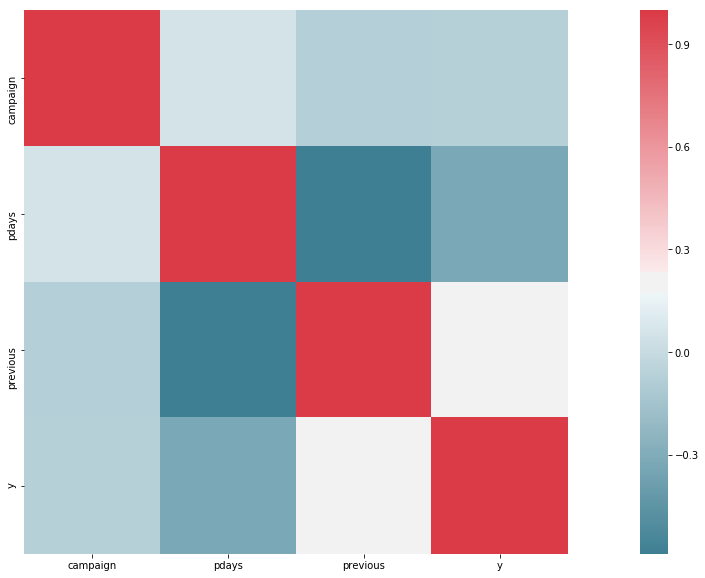

In [116]:
bank_campaign = bank[['campaign','pdays', 'previous','y']]
f, ax = plt.subplots(figsize=(26, 10))
corr = bank_campaign.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

- As we can see 'pdays' or 'number of days that passed by after the client was last contacted from a previous campaign' can actually impact the client's decision to buy a bank deposit

#### Feature Category of Social Data

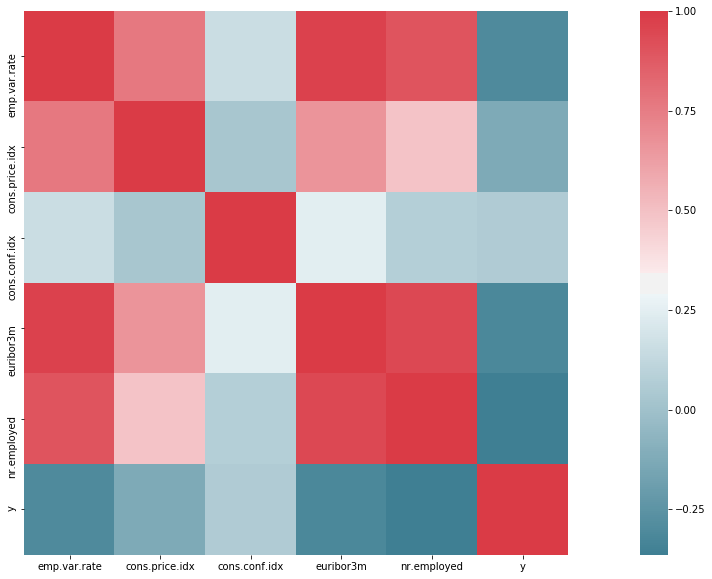

In [117]:
bank_social = bank[['emp.var.rate','cons.price.idx', 'cons.conf.idx','euribor3m','nr.employed','y']]
f, ax = plt.subplots(figsize=(26, 10))
corr = bank_social.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

- Social data represents the socio-economic data and as we can observe there is some strong negative correlation between nr.employed emp.var.rate, euribor3m and response variable
- Also 'nr.employed' is positively correlated with 'euribor3m','emp.var.rate' and 'cons.price.idx'

#### Model Creation
- We choose age, education pdays as our feature
- we convert the education column to one hot encoding 
- Add a bias column to the data at index 0
- Create a response variable using the 'y' column

In [118]:
bank = bank[['age','education','pdays','y']]
#normalize the data
non_num = ['education']
bank = pd.concat([bank.drop(non_num, axis=1), pd.get_dummies(bank[non_num])], axis=1)
min_val = bank.min()
max_val = bank.max()
bank = (bank-bank.min())/(bank.max()-bank.min())
#add bias column at index 0
bank.insert(0,'Bias',np.ones(30488))
#creating the Price column as predictor column
bank_response = bank['y']
bank.drop('y',inplace=True, axis = 1)   

In [119]:
np.random.RandomState(4)

def shuffle_data_bank():
    index_matrices = np.arange(0,30488,1)
    np.random.shuffle(index_matrices)
    #print(index_matrices[:10])
    X_train_bank = bank.iloc[index_matrices[:24390]]
    X_test_bank = bank.iloc[index_matrices[24390:]]
    Y_train_bank = bank_response.iloc[index_matrices[:24390]].values.reshape(24390,1)
    Y_test_bank = bank_response.iloc[index_matrices[24390:]].values.reshape(6098,1) 
    return X_train_bank,X_test_bank,Y_train_bank,Y_test_bank

#### Running the prediction  using SGA

The log loss observed on test set was 0.3530627206002447


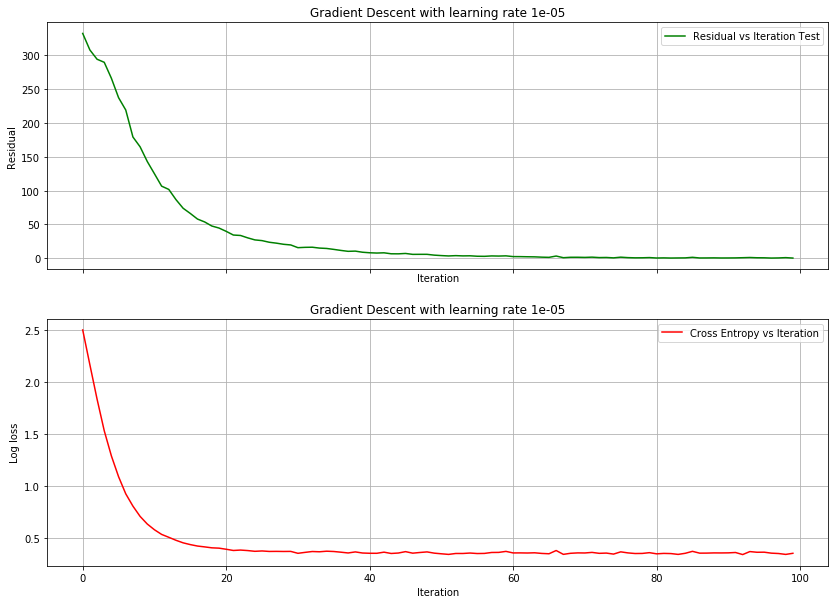

In [125]:
#perform the predictions 
m3,res_plot,rmse_plot = gradient_descent(shuffle_data_bank, alpha=1e-5 ,beta_shape=10, N=100)

In [120]:
print(f"The upscaled error\n {((0.3557634)*(max_val-min_val))+min_val}")

The upscaled error
 age                               44.749545
pdays                            355.407637
y                                  0.355763
education_basic.4y                 0.355763
education_basic.6y                 0.355763
education_basic.9y                 0.355763
education_high.school              0.355763
education_illiterate               0.355763
education_professional.course      0.355763
education_university.degree        0.355763
dtype: float64


#### Running the prediction  using Adagrad

The log loss observed on test set was 0.3644677839613344


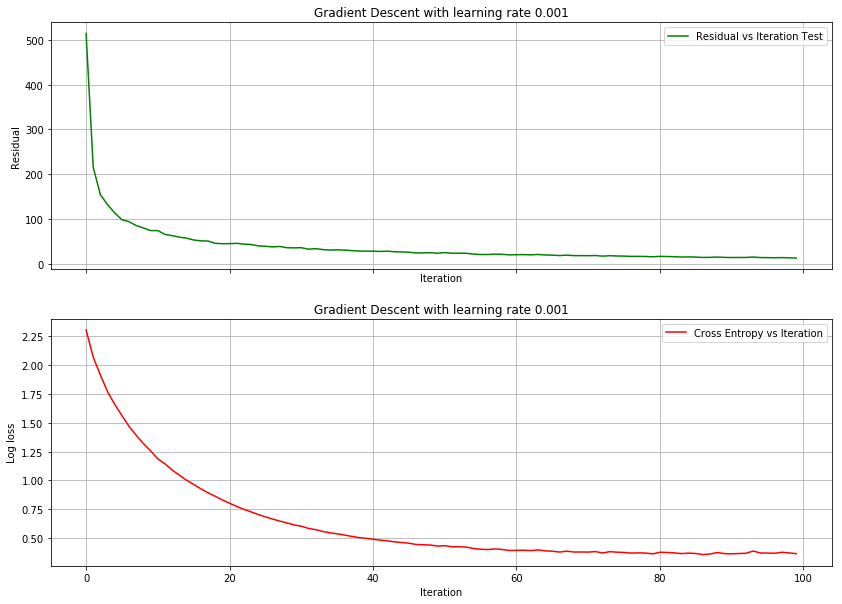

In [91]:
#perform the predictions 
m3,res_plot,rmse_plot = adaGrad(shuffle_data_bank, alpha=1e-3 ,beta_shape=10, N=100)

In [122]:
print(f"The upscaled error\n {((0.36446778)*(max_val-min_val))+min_val}")

The upscaled error
 age                               45.428487
pdays                            364.103312
y                                  0.364468
education_basic.4y                 0.364468
education_basic.6y                 0.364468
education_basic.9y                 0.364468
education_high.school              0.364468
education_illiterate               0.364468
education_professional.course      0.364468
education_university.degree        0.364468
dtype: float64


#### Running the prediction using the momentum using SGA

The log loss observed on test set was 0.3515694508381398


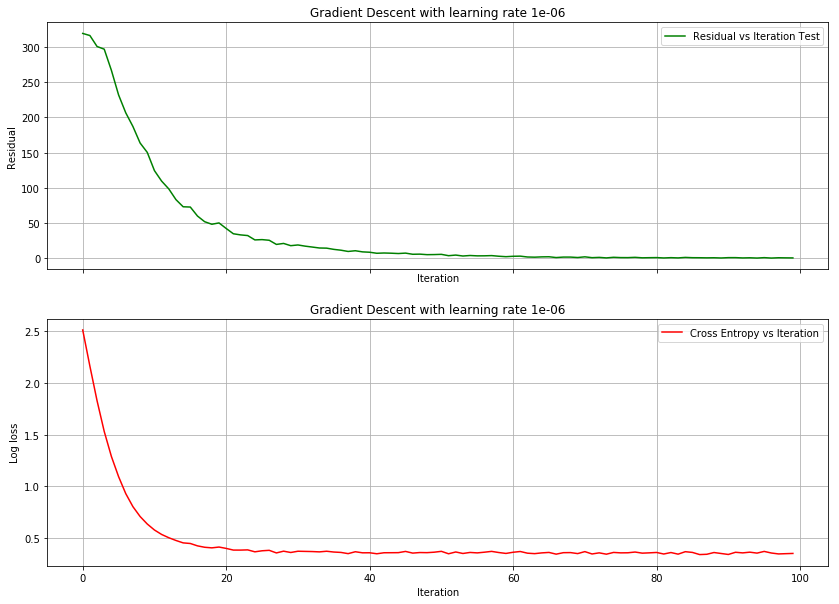

In [123]:
#perform the predictions 
m3,res_plot,rmse_plot = gradient_descent_momentum(shuffle_data_bank, alpha=1e-6 ,beta_shape=10, N=100)

In [121]:
print(f"The upscaled error\n {((0.44149180)*(max_val-min_val))+min_val}")

The upscaled error
 age                               51.436360
pdays                            441.050308
y                                  0.441492
education_basic.4y                 0.441492
education_basic.6y                 0.441492
education_basic.9y                 0.441492
education_high.school              0.441492
education_illiterate               0.441492
education_professional.course      0.441492
education_university.degree        0.441492
dtype: float64


### Comparing Adagrad and Steplengthbolddriver

#### Adagrad :-

- Allows adaptive updates in the parameters based on each feature, such that sparse features are updated more and less sparse are updated less frequently.
- Updates after each iteration
- Adagrad has a possible risk of running into underflow (gradient divided by sqaureroot), thus a small residual can be added to prevent that
- Adagrad can also suffer from underflow due to accummulation of large values such that the denominator (Squareroot of history)
  becomes very large

#### Stepbold : - 

- Iterates and updates the learning rate on the basis of the function value at the end of each epoch,such that the new value is always greater than the current value
- The learning rate might actually increase or decrease on the basis of the current point 
- Updates the parameter after each epoch 

### Compare the  log loss graphs for both algorithms

- We can observe that the graph for both the algorithm converge to a low value around 50 iterations.
- Using momentum further improves the result since it does not allow any misdirected steps.
- Adagrad works and performs better in the second dataset, which has *less sparsity* compared to the first one. Since adagrad allows a parameter based adaptive learning, it achieves better results compared to SGD in less sparse data.
- Whereas adagrad does not perform that well in case of a data with high sparsity.



### Note: The upscaled error can be interpreted as values of each respective features that need to be divided by the original values of that feature in the test set before being sent to the model.